In [ ]:
# 1. Importar librerías necesarias
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
import random
import math

In [ ]:
# Cargar el dataset
datos, metadatos = tfds.load("fashion_mnist", as_supervised=True, with_info=True)
datos_entrenamiento, datos_pruebas = datos["train"], datos["test"]
nombres_clases = metadatos.features["label"].names

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/incomplete.IHWQJX_3.0.1/fashion_mnist-train.tfrecord*...:   …

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/incomplete.IHWQJX_3.0.1/fashion_mnist-test.tfrecord*...:   0…

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [ ]:
# --- Preprocesamiento ---
def normalizar(imagen, etiqueta):
    imagen = tf.cast(imagen, tf.float32) / 255.0
    return imagen, etiqueta

datos_entrenamiento = datos_entrenamiento.map(normalizar).cache().shuffle(60000).batch(32).prefetch(1)
datos_pruebas = datos_pruebas.map(normalizar).cache().batch(32).prefetch(1)

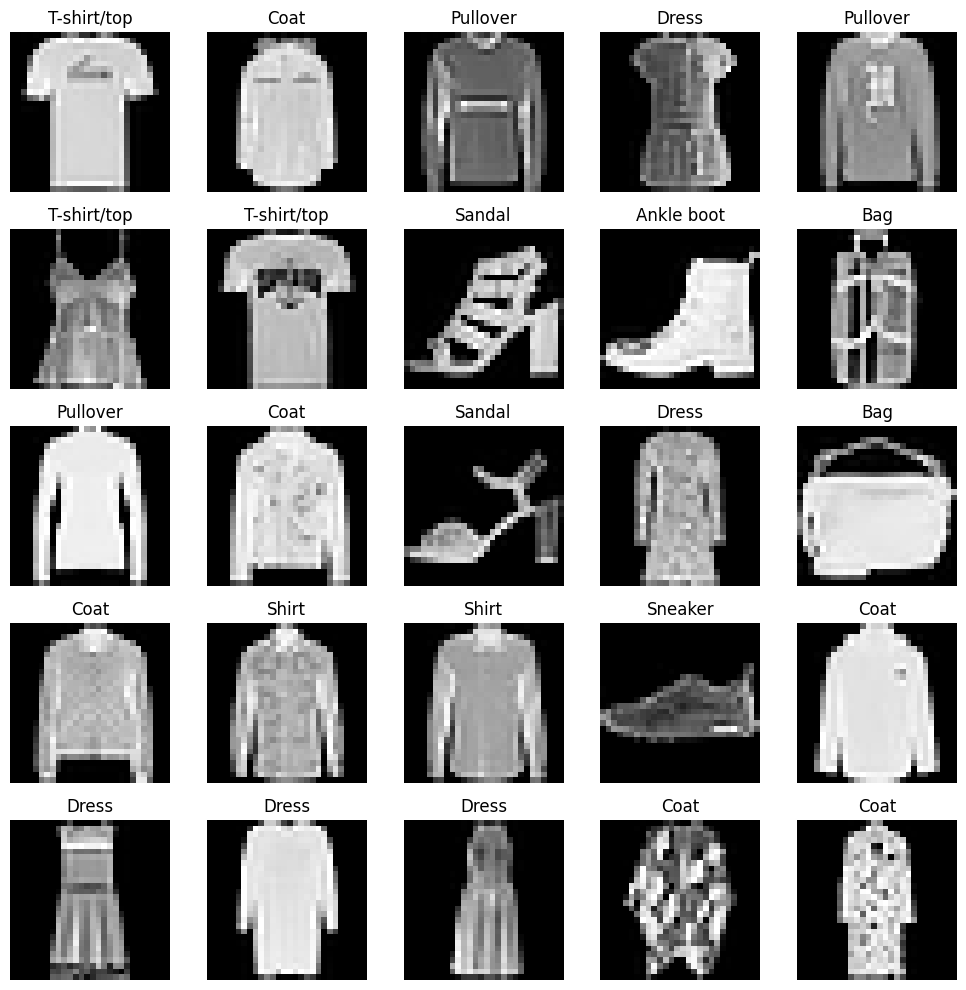

In [ ]:
# --- Visualización de datos ---
plt.figure(figsize=(10, 10))
for i, (imagen, etiqueta) in enumerate(datos_entrenamiento.unbatch().take(25)):
    plt.subplot(5, 5, i + 1)
    plt.imshow(imagen.numpy().reshape(28, 28), cmap="gray")
    plt.title(nombres_clases[etiqueta.numpy()])
    plt.axis("off")
plt.tight_layout()
plt.show()

In [ ]:
# --- Modelo CNN ---
modelo = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

modelo.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [ ]:
# --- Entrenamiento ---
historial = modelo.fit(datos_entrenamiento, epochs=10, steps_per_epoch=math.ceil(60000/32), validation_data=datos_pruebas)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 19ms/step - accuracy: 0.7830 - loss: 0.6076 - val_accuracy: 0.8709 - val_loss: 0.3541
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 17ms/step - accuracy: 0.8897 - loss: 0.3083 - val_accuracy: 0.8911 - val_loss: 0.2960
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.9027 - loss: 0.2622 - val_accuracy: 0.9011 - val_loss: 0.2749
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.9171 - loss: 0.2221 - val_accuracy: 0.9089 - val_loss: 0.2519
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - accuracy: 0.9280 - loss: 0.1933 - val_accuracy: 0.8867 - val_loss: 0.3031
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 17ms/step - accuracy: 0.9344 - loss: 0.1697 - val_accuracy: 0.9157 - val_loss: 0.2389
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.9438 - loss: 0.1495 - val_accuracy: 0.9146 - val_loss: 0.2564
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 17ms/step - accuracy: 0.9478 -

In [ ]:
# --- Evaluación ---
loss, accuracy = modelo.evaluate(datos_pruebas)
print(f"Precisión en datos de prueba: {accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9157 - loss: 0.2837
Precisión en datos de prueba: 0.9132


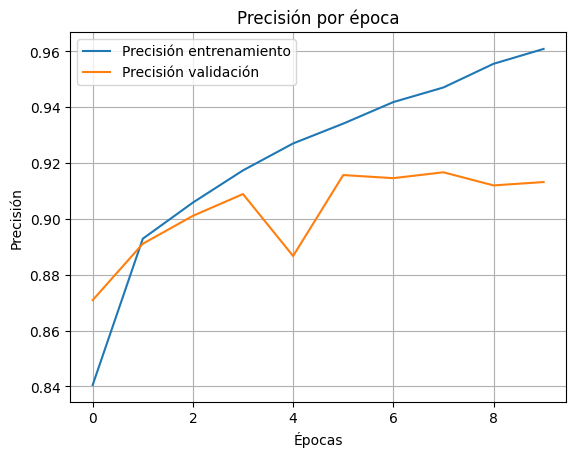

In [ ]:
# --- Gráfica de precisión ---
plt.plot(historial.history['accuracy'], label='Precisión entrenamiento')
plt.plot(historial.history['val_accuracy'], label='Precisión validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.grid(True)
plt.title('Precisión por época')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


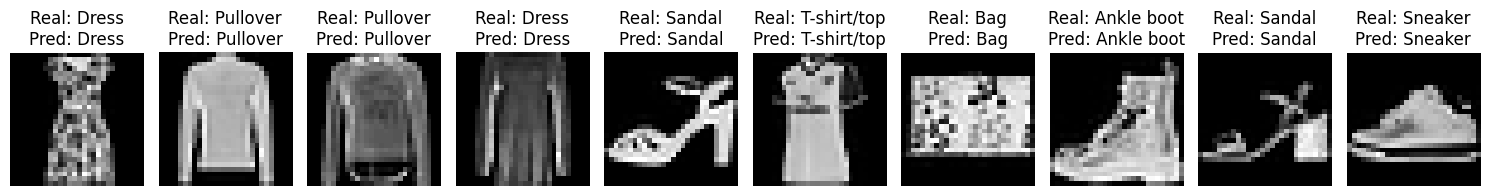

In [ ]:
# --- Predicciones aleatorias ---
test_images = []
test_labels = []
for img, lbl in datos_pruebas.unbatch().take(1000):  # Extrae 1000 imágenes
    test_images.append(img.numpy())
    test_labels.append(lbl.numpy())

test_images = np.array(test_images)
test_labels = np.array(test_labels)

num_samples = 10
indices = random.sample(range(len(test_images)), num_samples)
sample_images = test_images[indices]
sample_labels = test_labels[indices]
predictions = modelo.predict(sample_images)
predicted_labels = np.argmax(predictions, axis=1)

plt.figure(figsize=(15, 3))
for i in range(num_samples):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(sample_images[i].reshape(28, 28), cmap='gray')
    plt.title(f'Real: {nombres_clases[sample_labels[i]]}\nPred: {nombres_clases[predicted_labels[i]]}')
    plt.axis('off')
plt.tight_layout()
plt.show()